In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

In [2]:
baseline_file = get_baseline()
run_name = os.path.basename(baseline_file).replace('.db','')


In [3]:
slicer = maf.generate_presto_pop_slicer(skyregion=None, n_events=1)
slicer.slice_points["ra"] = np.array([0.])
slicer.slice_points["dec"] = np.array([np.radians(-20.)])
slicer.slice_points["peak_time"] = np.array([500])

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maf_contrib/presto_color_kne_pop_metric.py:124: UserWarning: Skyregion None not recognized, using whole sky
  warnings.warn("Skyregion %s not recognized, using whole sky" % skyregion)


In [4]:
metric = maf.PrestoColorKNePopMetric(skyregion='extragalactic')
summaryMetrics = [maf.MedianMetric(), maf.SumMetric()]
bundle = maf.MetricBundle(metric, slicer, None, run_name=run_name, summary_metrics=summaryMetrics)


In [5]:
slicer.slice_points

{'sid': array([0]),
 'ra': array([0.]),
 'dec': array([-0.34906585]),
 'gall': array([4.9023591]),
 'galb': array([-0.20850904]),
 'peak_time': array([500]),
 'file_indx': array([59]),
 'distance': array([188.54546983])}

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plot_handler.py:665: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn("Cannot plot object metric values with this plotter.")
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn("Optimal bin calculation calculated NaN: returning %i" % (nbin_max))
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn("Optimal bin calculation calculated NaN: returning %i" % (nbin_max))
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn("Optimal bin calculation calculated NaN: returning %i" % (nbin_max))


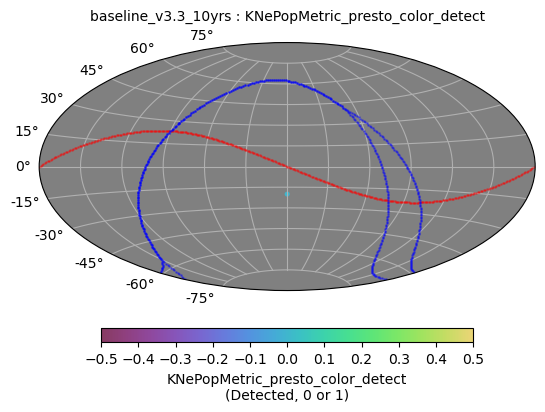

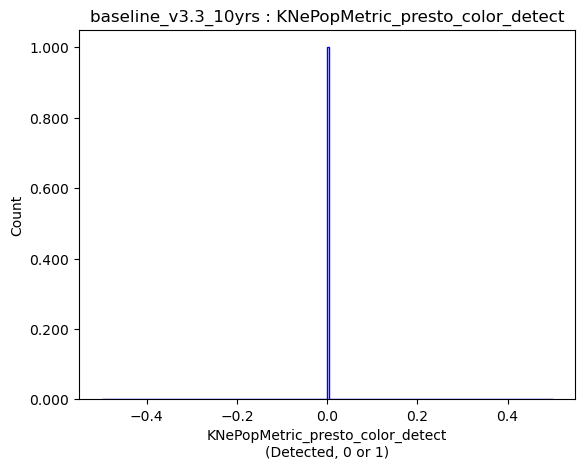

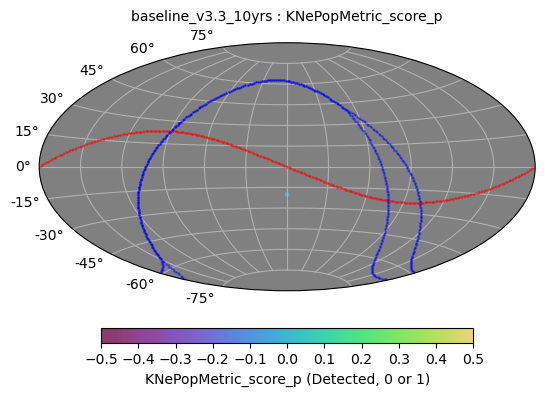

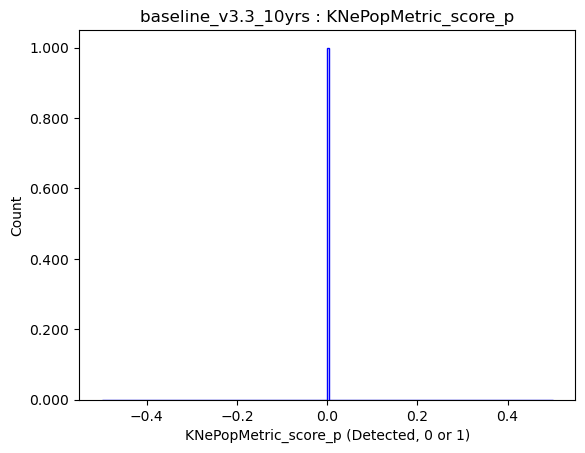

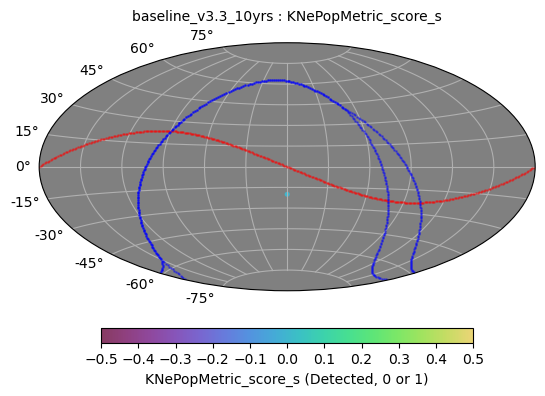

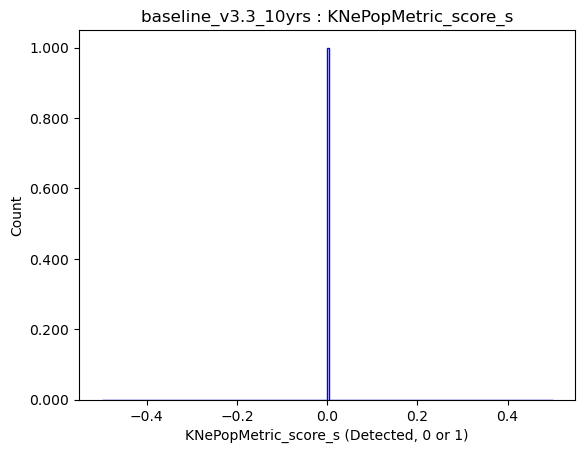

In [6]:
outDir = 'test_presto'
bdict = {'presto': bundle}
g = maf.MetricBundleGroup(bdict, baseline_file, outDir)
g.run_all()
g.plot_all(closefigs=False)


In [7]:
bdict['presto'].metric_values

masked_array(data=[{'presto_color_detect': 0, 'scoreS': 0, 'scoreP': 0}],
             mask=[False],
       fill_value=0,
            dtype=object)